# Objetivo do projeto
"""
Análise preditiva de campanha de marketing bancário.
Objetivo: identificar clientes com maior propensão a aderir à oferta e otimizar ROI da campanha.
"""

In [152]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import warnings
import analisador
importlib.reload(analisador)
from analisador import BankDataEDA

df = pd.read_csv('dados/bank-full.csv', sep=';')

eda_df = BankDataEDA(filepath = 'dados/bank-full.csv', delimiter = ';')

eda_df.info_basica()
eda_df.analise_missings()
eda_df.analise_numericas()
eda_df.analise_categoricas()
eda_df.analise_target()
eda_df.resumo_problemas()

INFORMAÇÕES BÁSICAS DO DATASET

Shape: 45,211 
            linhas × 17 colunas
Memória: 25.75 MB

Variáveis Numéricas (7): age, balance, day, duration, campaign, pdays, previous
Variáveis Categóricas (10): job, marital, education, default, housing, loan, contact, month, poutcome, y

 HEAD:    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1 



GERANDO VISUALIZAÇÕES COMPLETAS



1. ANÁLISE UNIVARIADA
------------------------------------------------------------


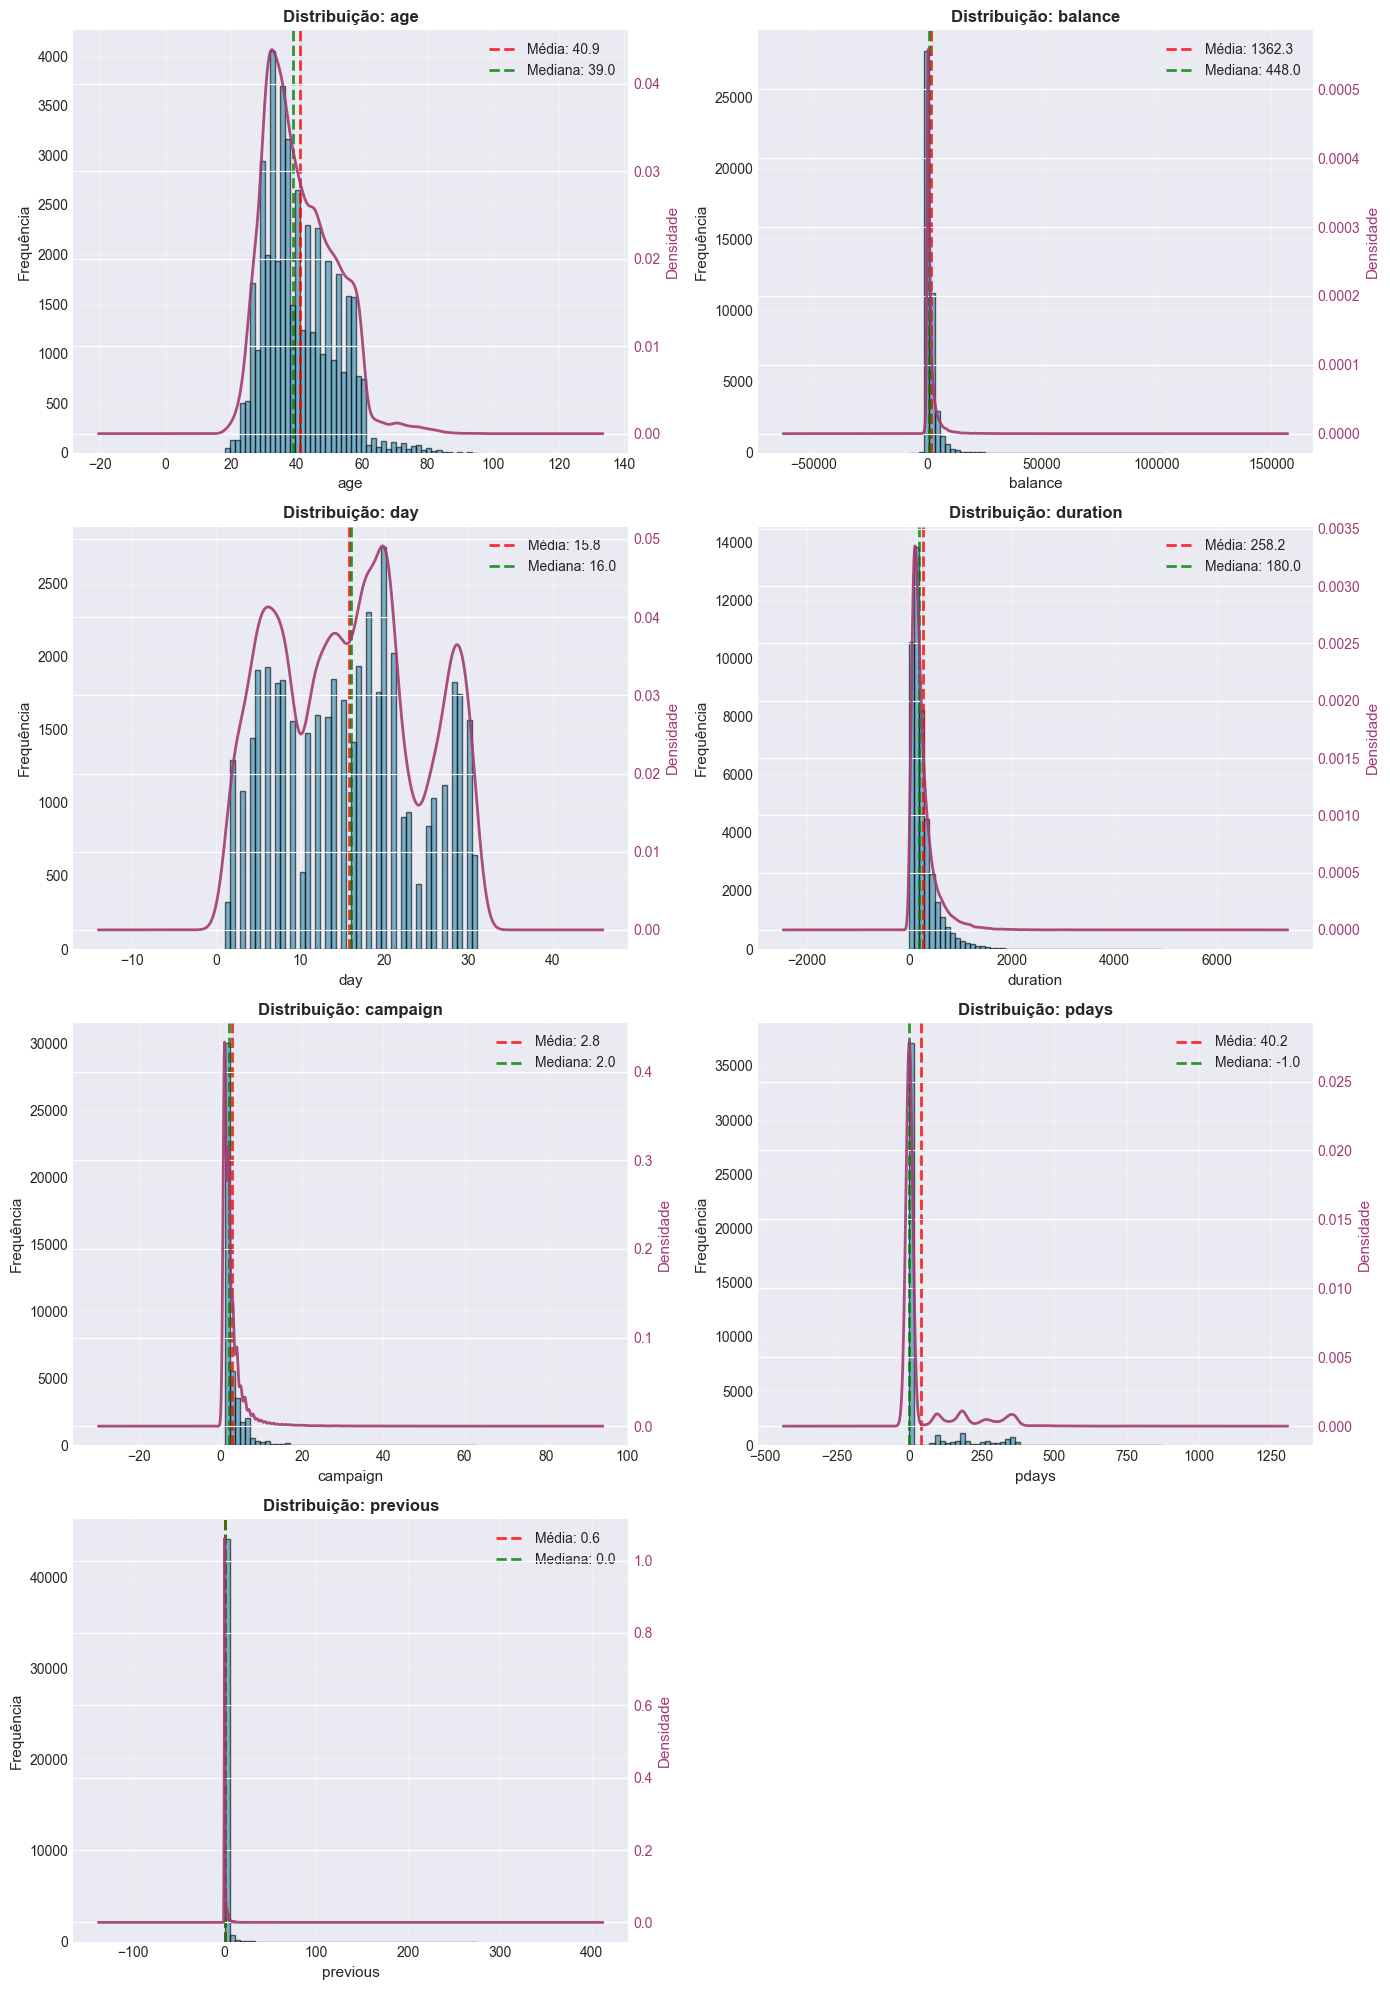

7 distribuições numéricas plotadas


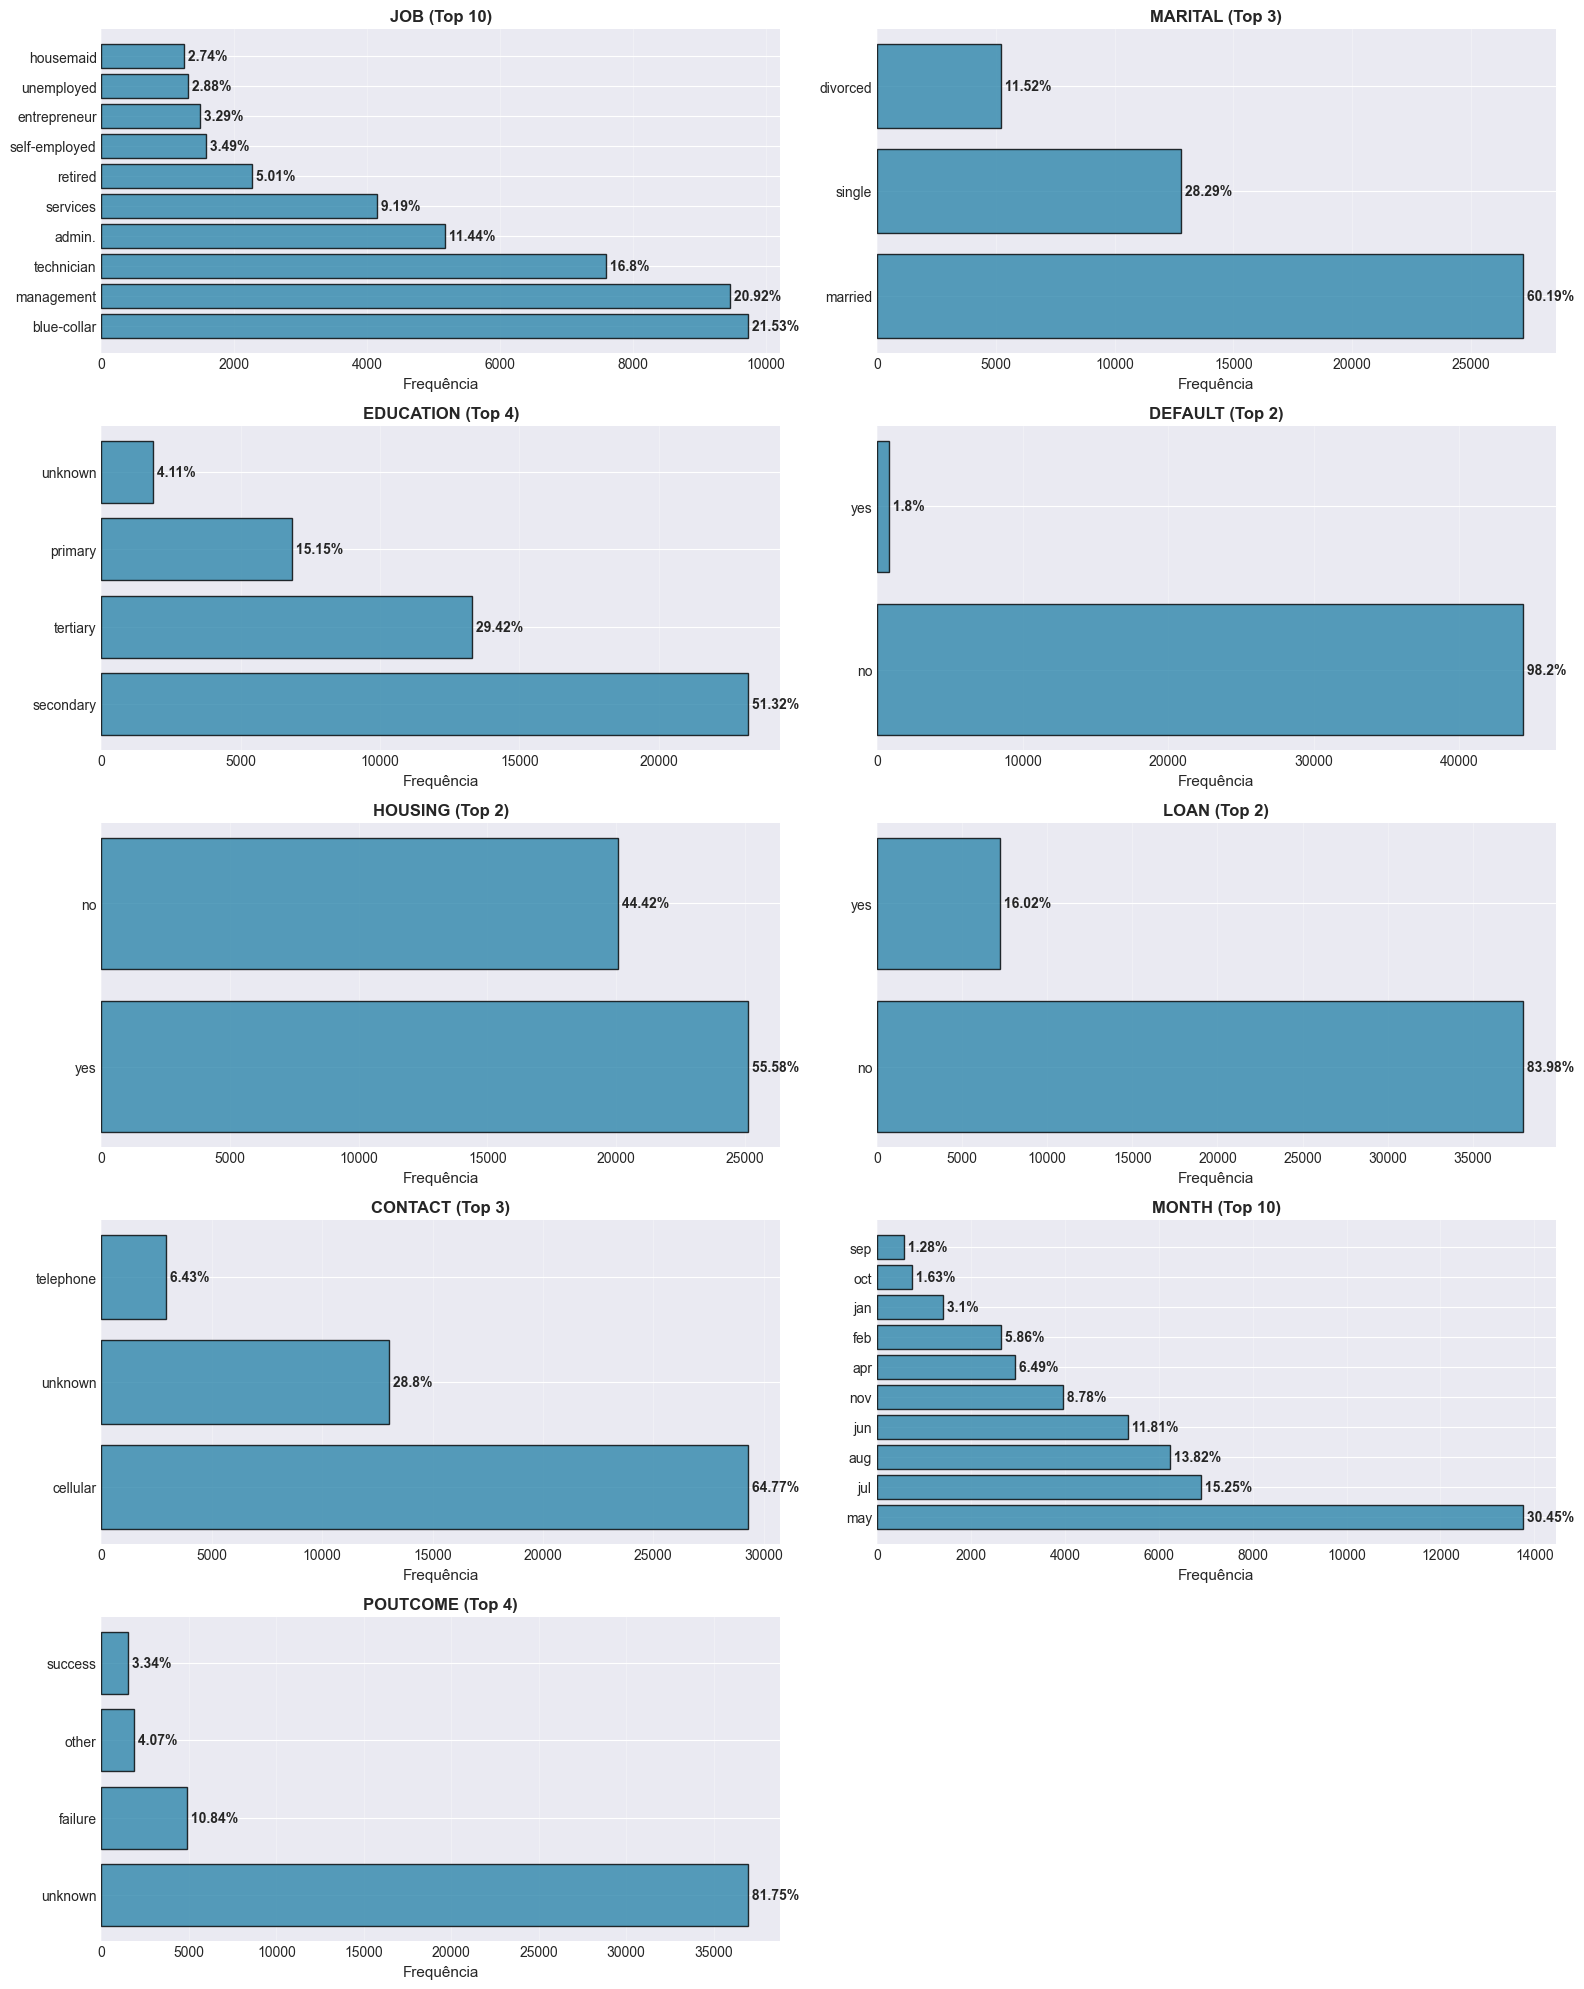

✓ 9 distribuições categóricas plotadas

2. ANÁLISE BIVARIADA (vs TARGET)
------------------------------------------------------------


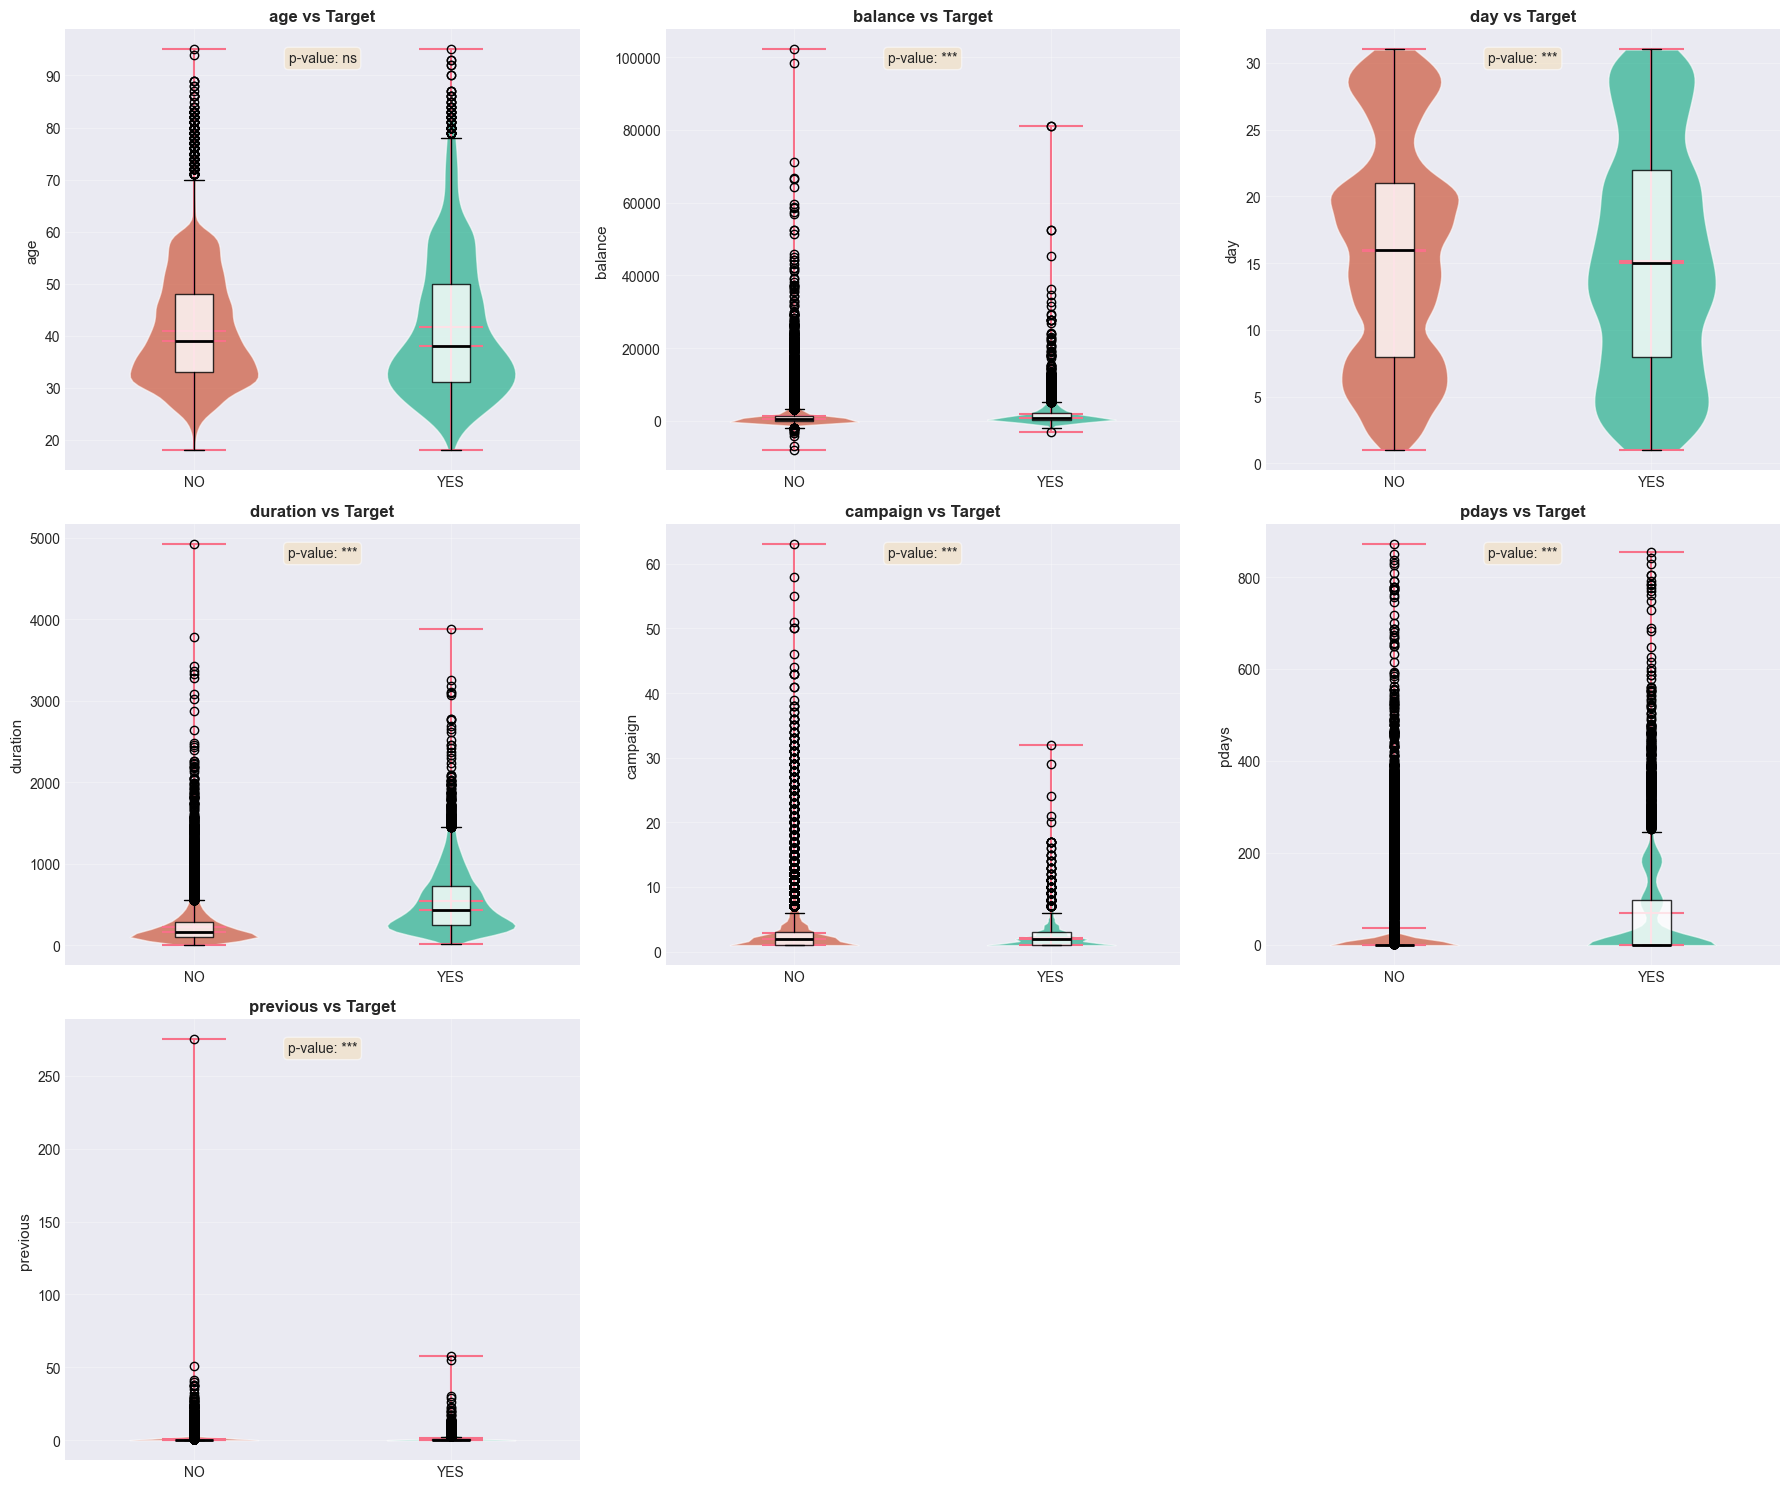

✓ 7 comparações numéricas vs target plotadas


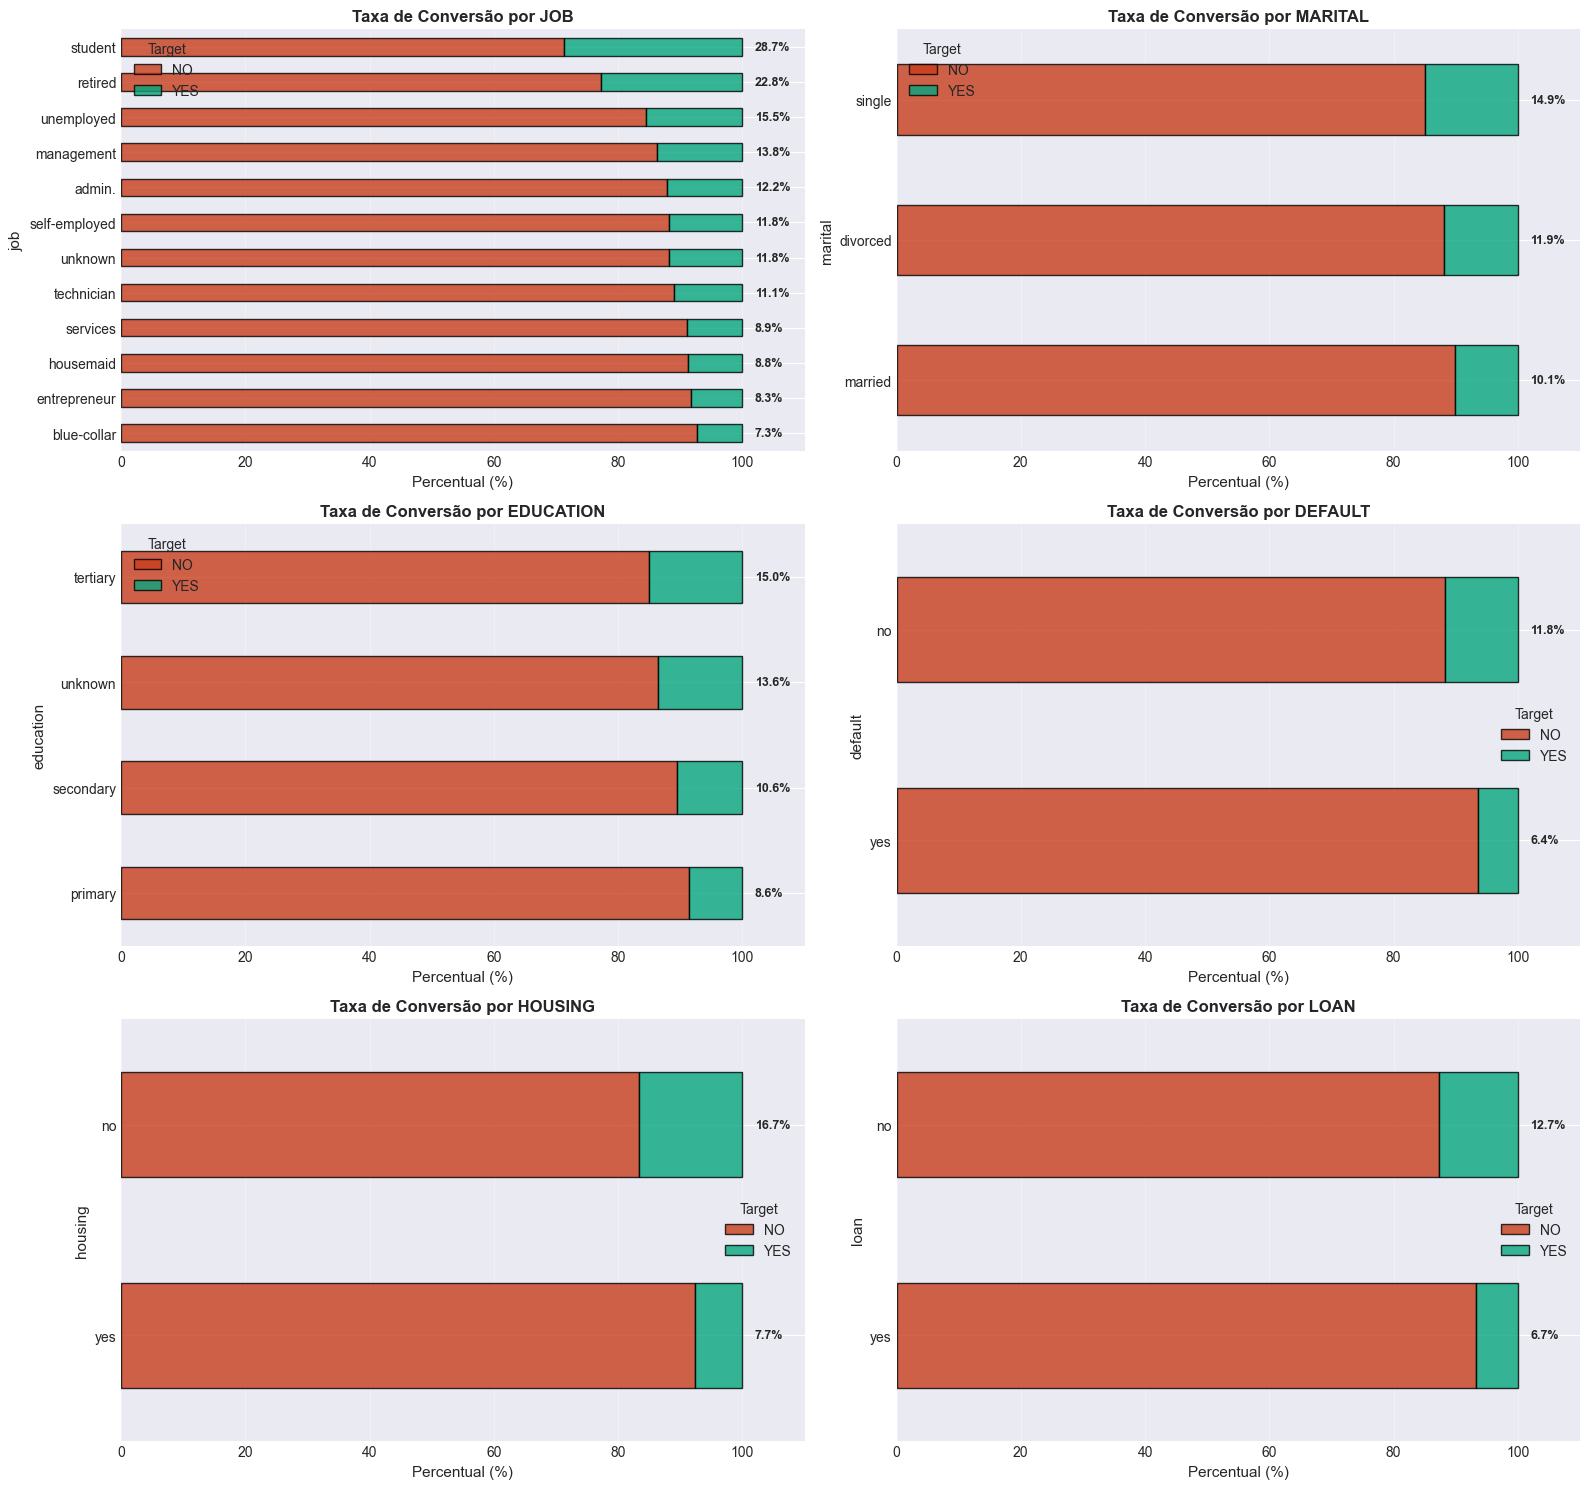

✓ 6 análises categóricas vs target plotadas

3. CORRELAÇÕES
------------------------------------------------------------


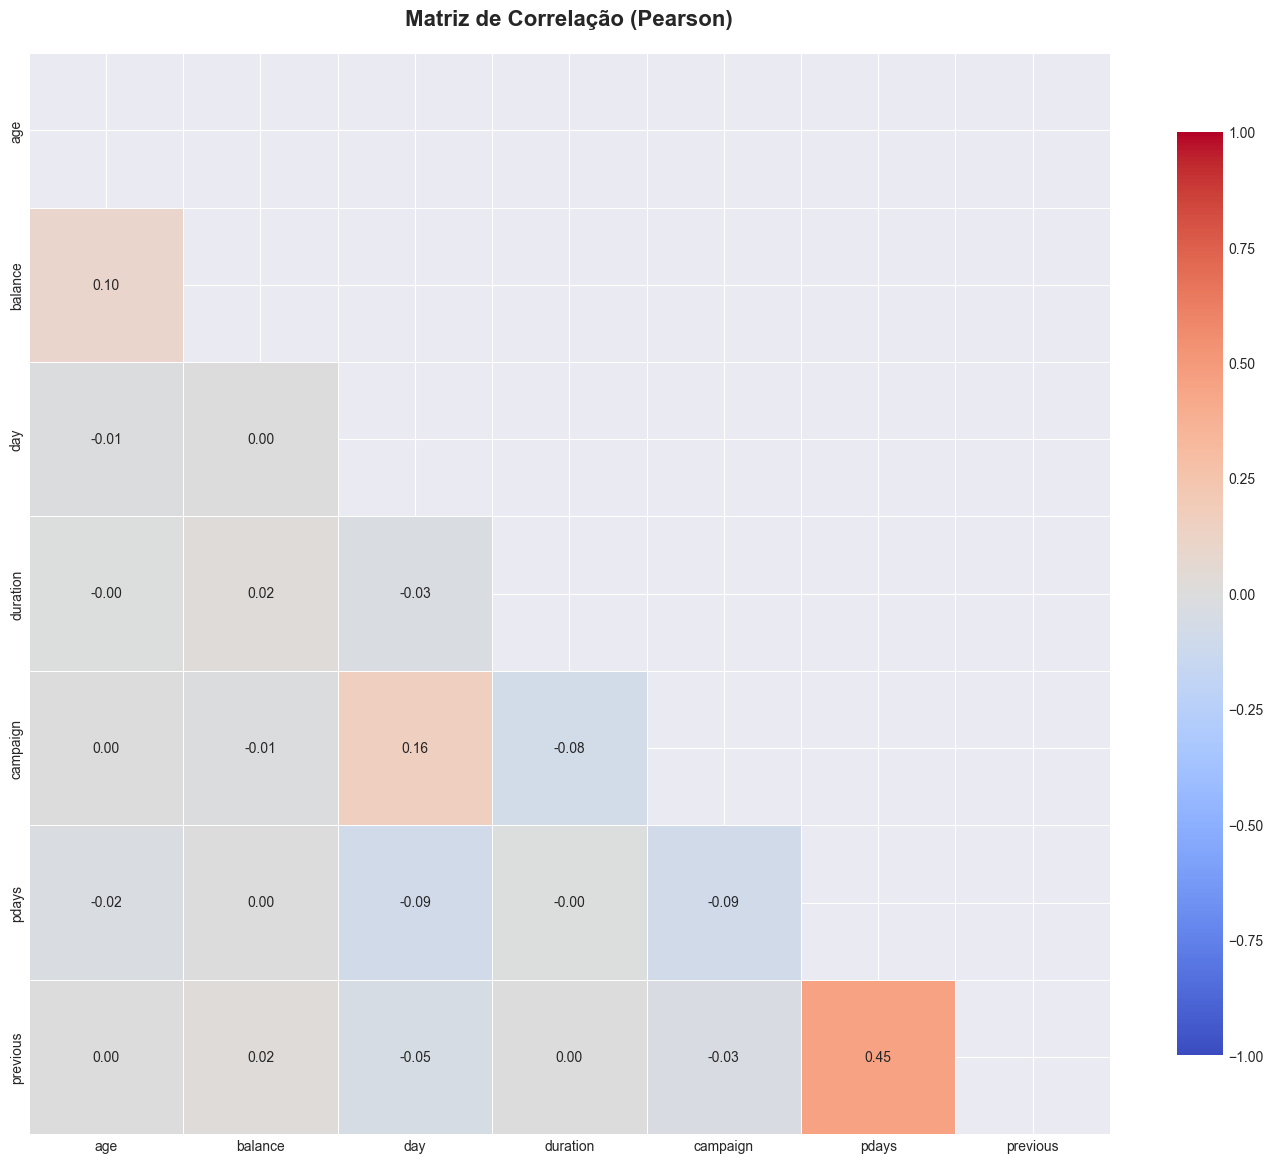


✓ Nenhuma correlação forte detectada (|r| > 0.7)



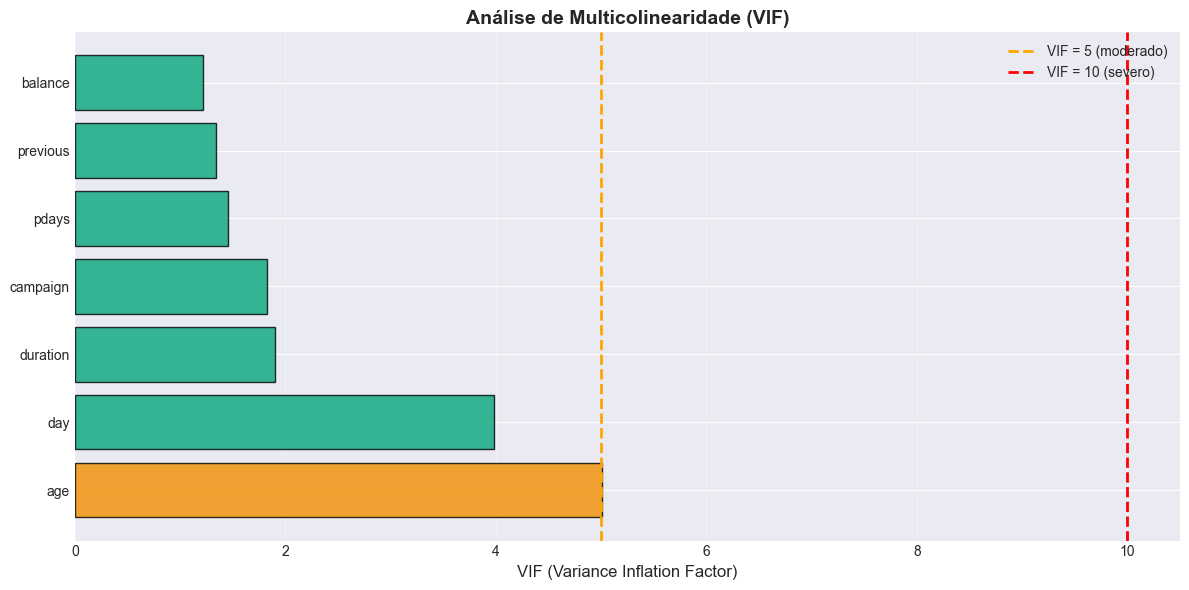


✓ Multicolinearidade sob controle (todos VIF < 10)


4. SEGMENTAÇÃO
------------------------------------------------------------


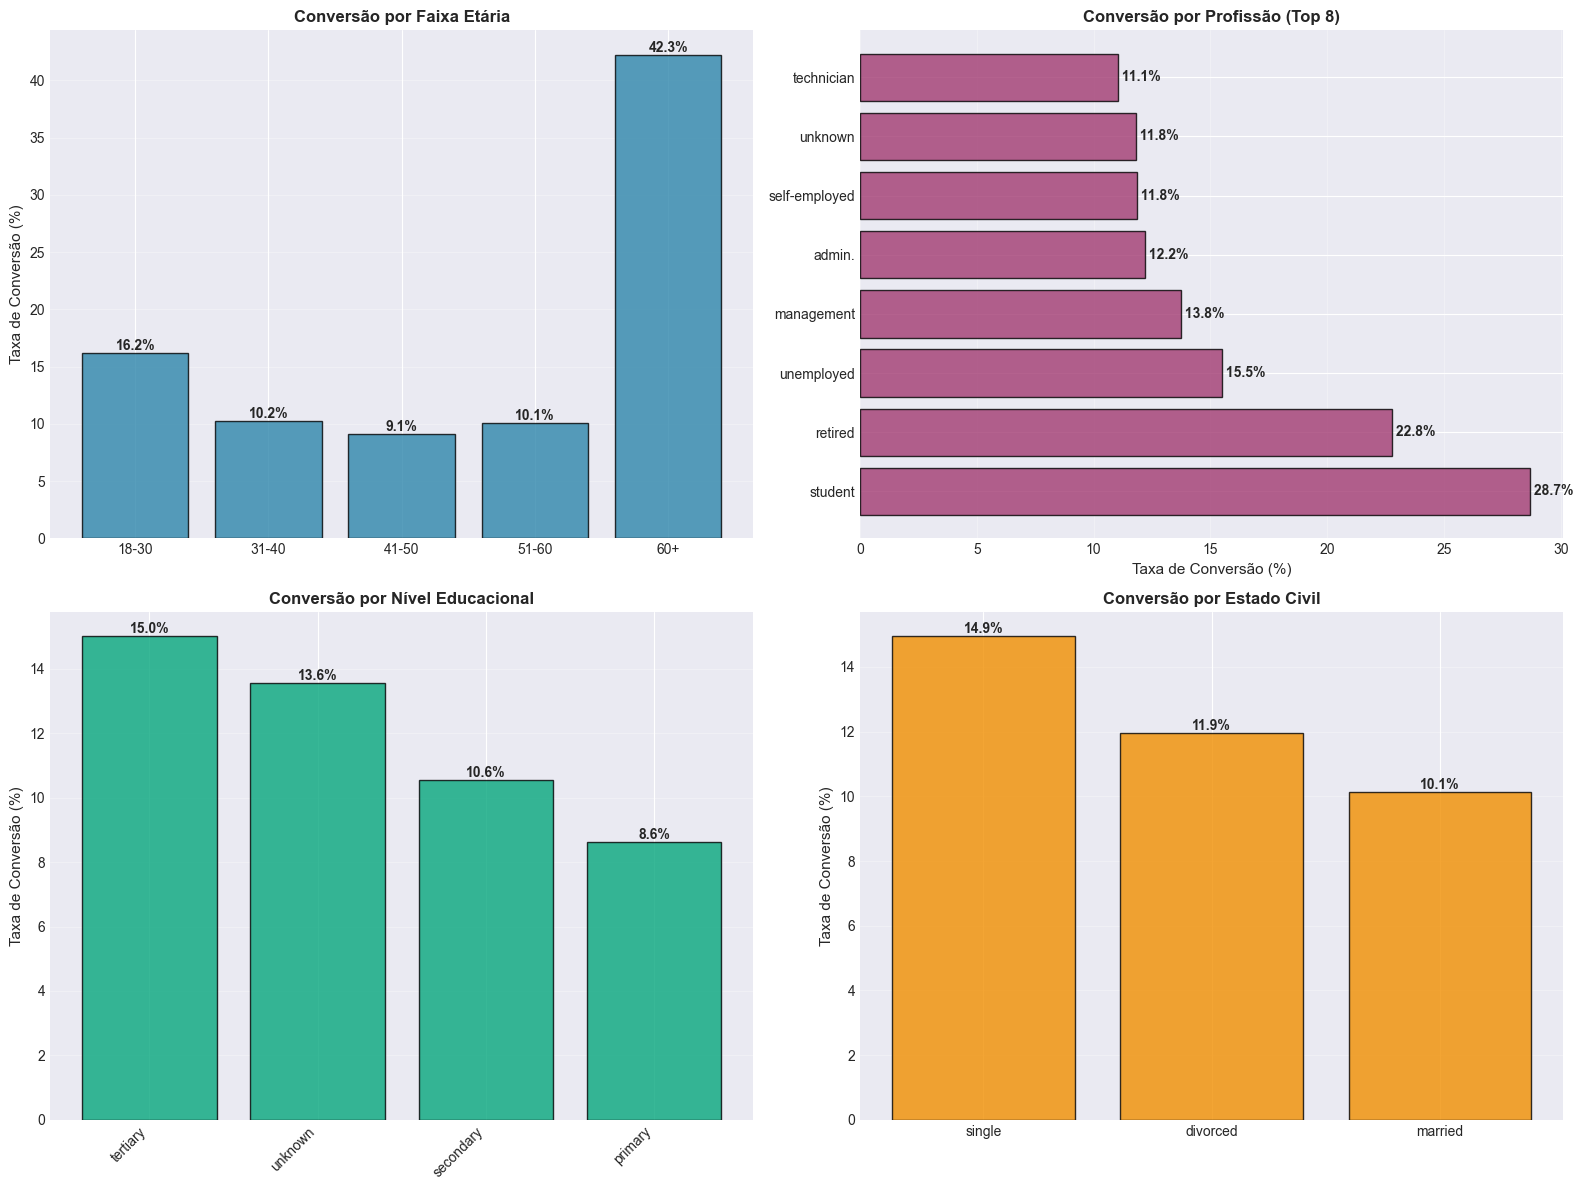

✓ Segmentação demográfica plotada


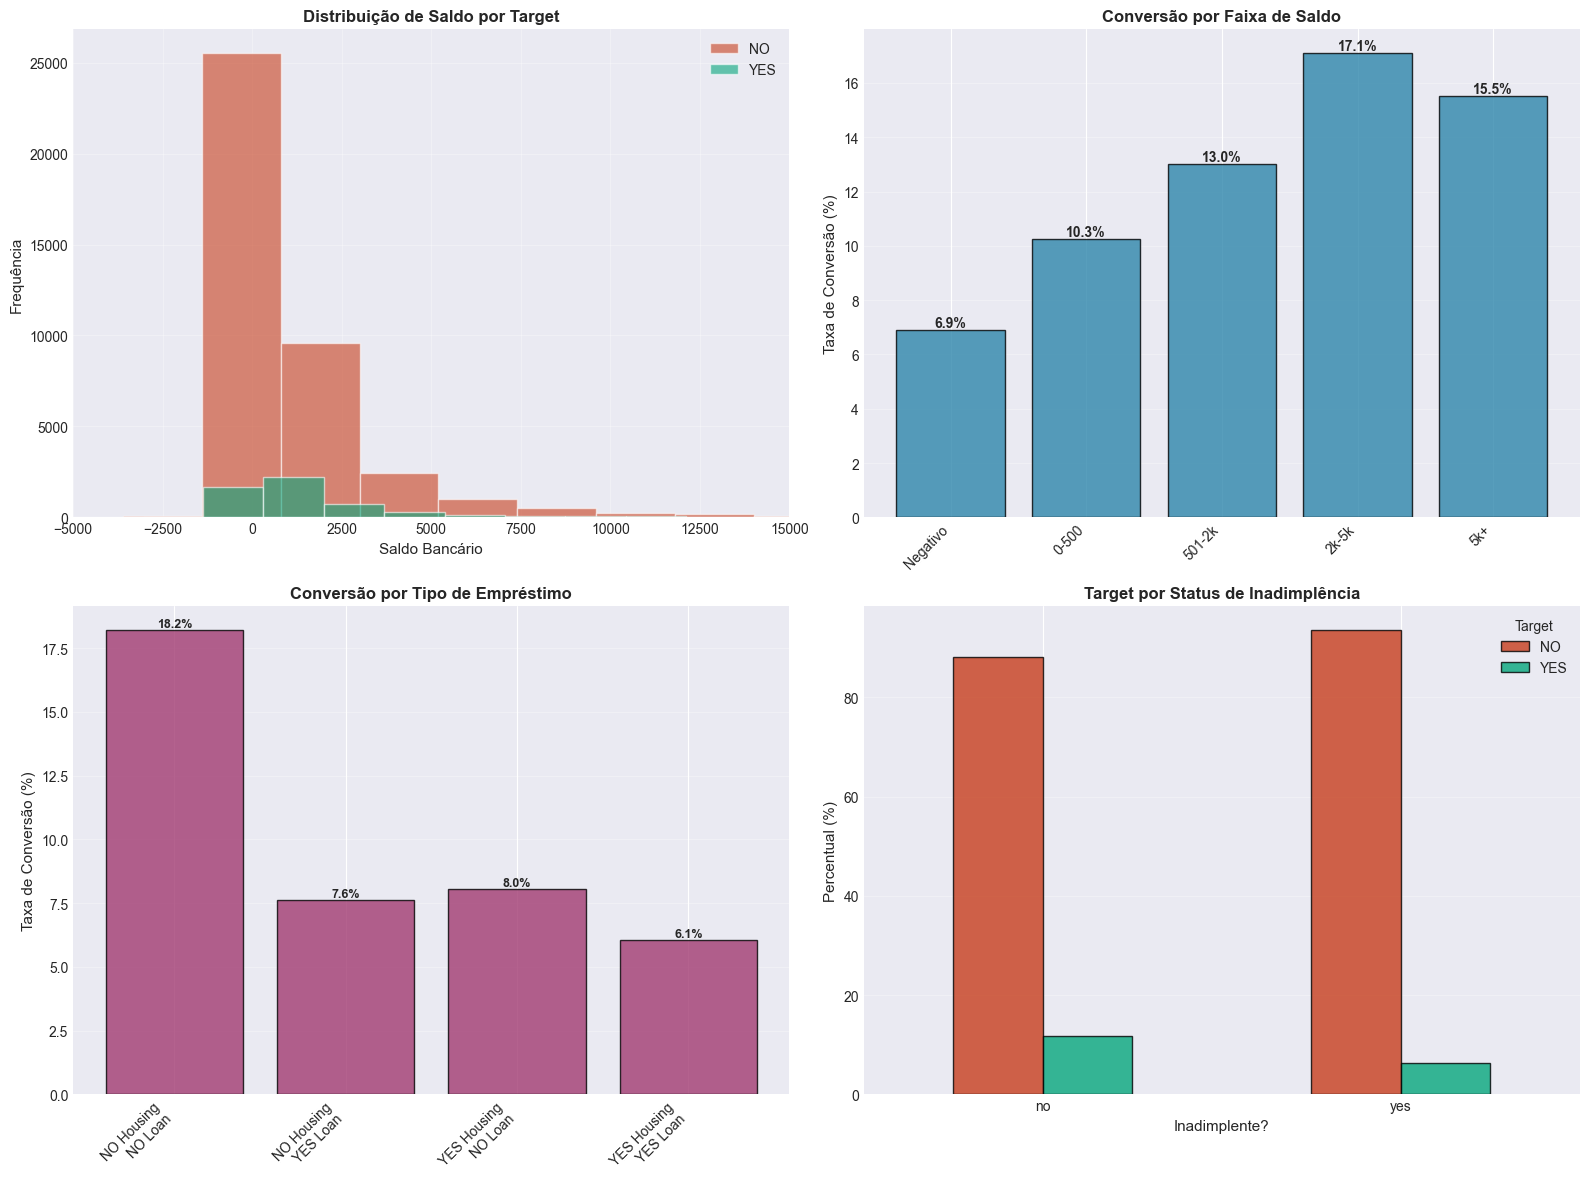

✓ Perfil financeiro plotado

5. ANÁLISE DE CAMPANHA
------------------------------------------------------------


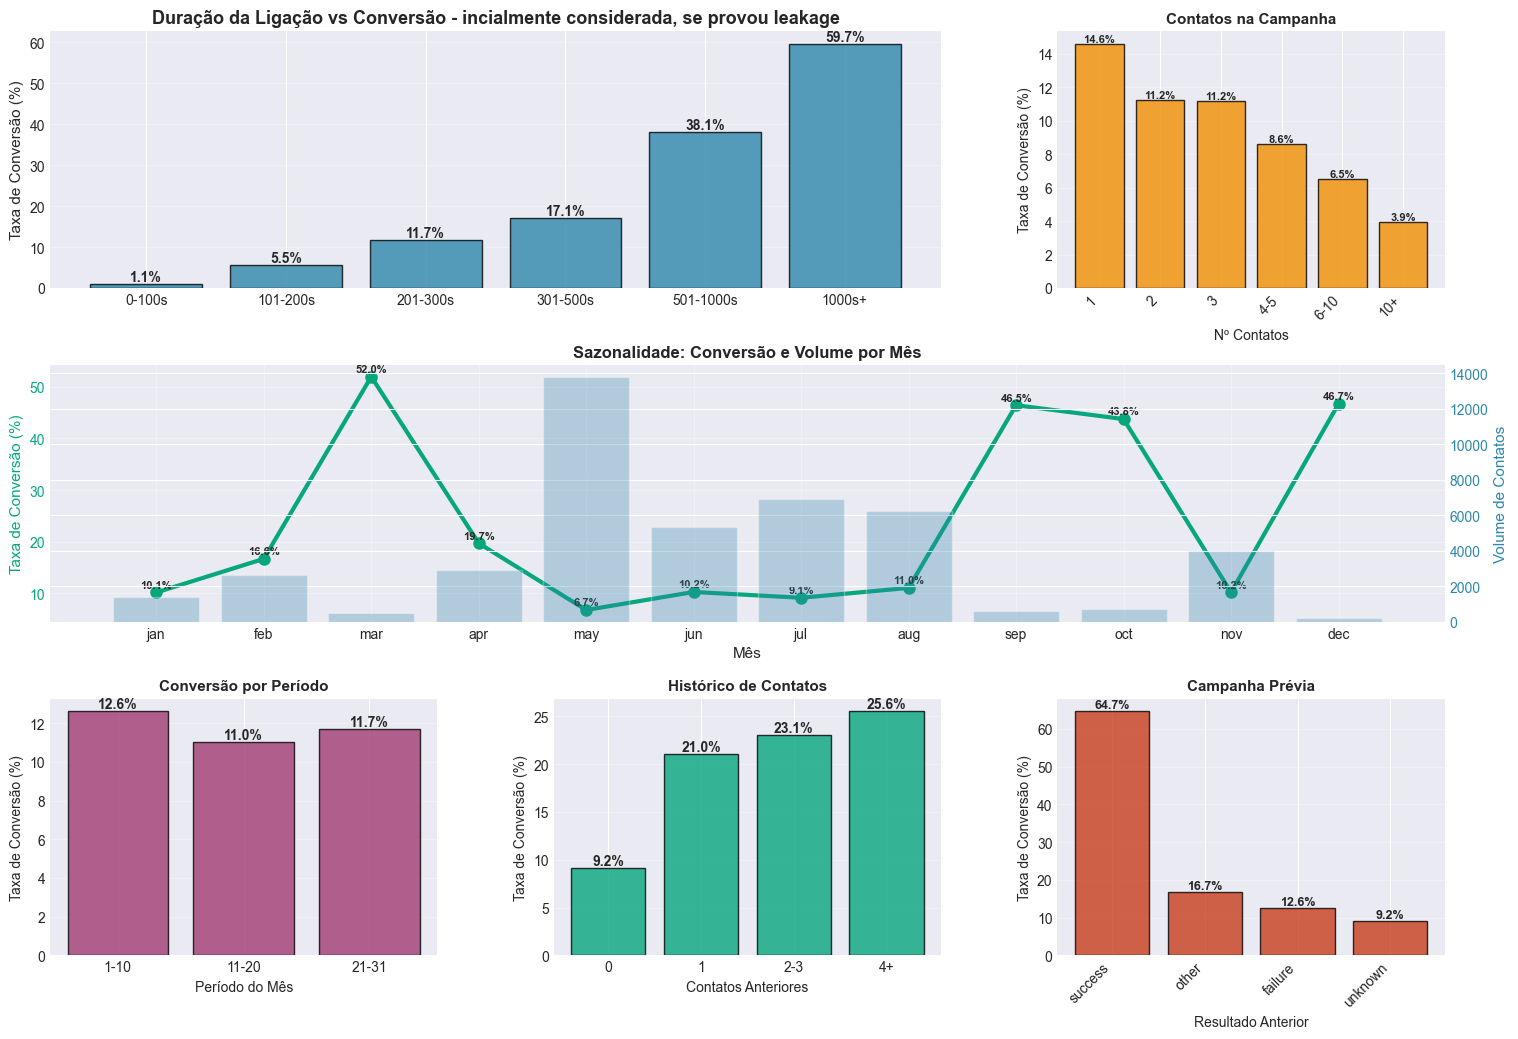

✓ Análise de campanha plotada


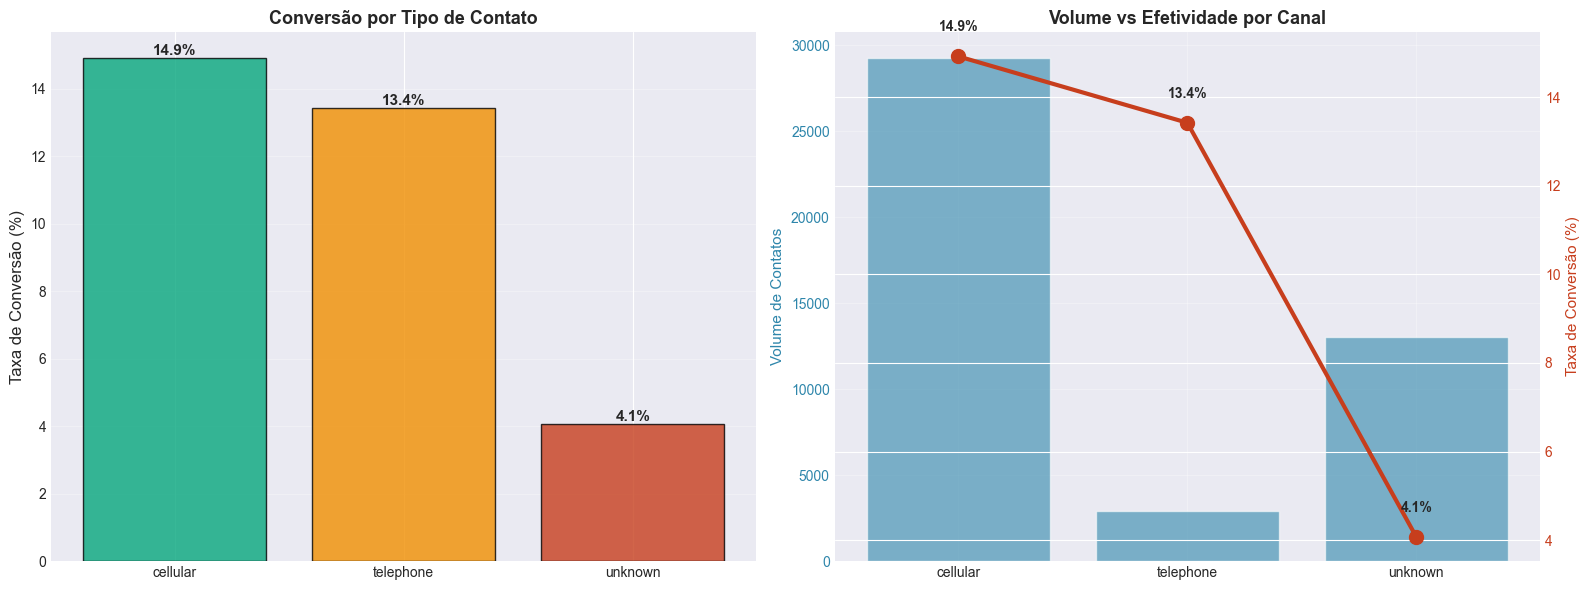

✓ Análise de tipo de contato plotada

6. DASHBOARD EXECUTIVO
------------------------------------------------------------


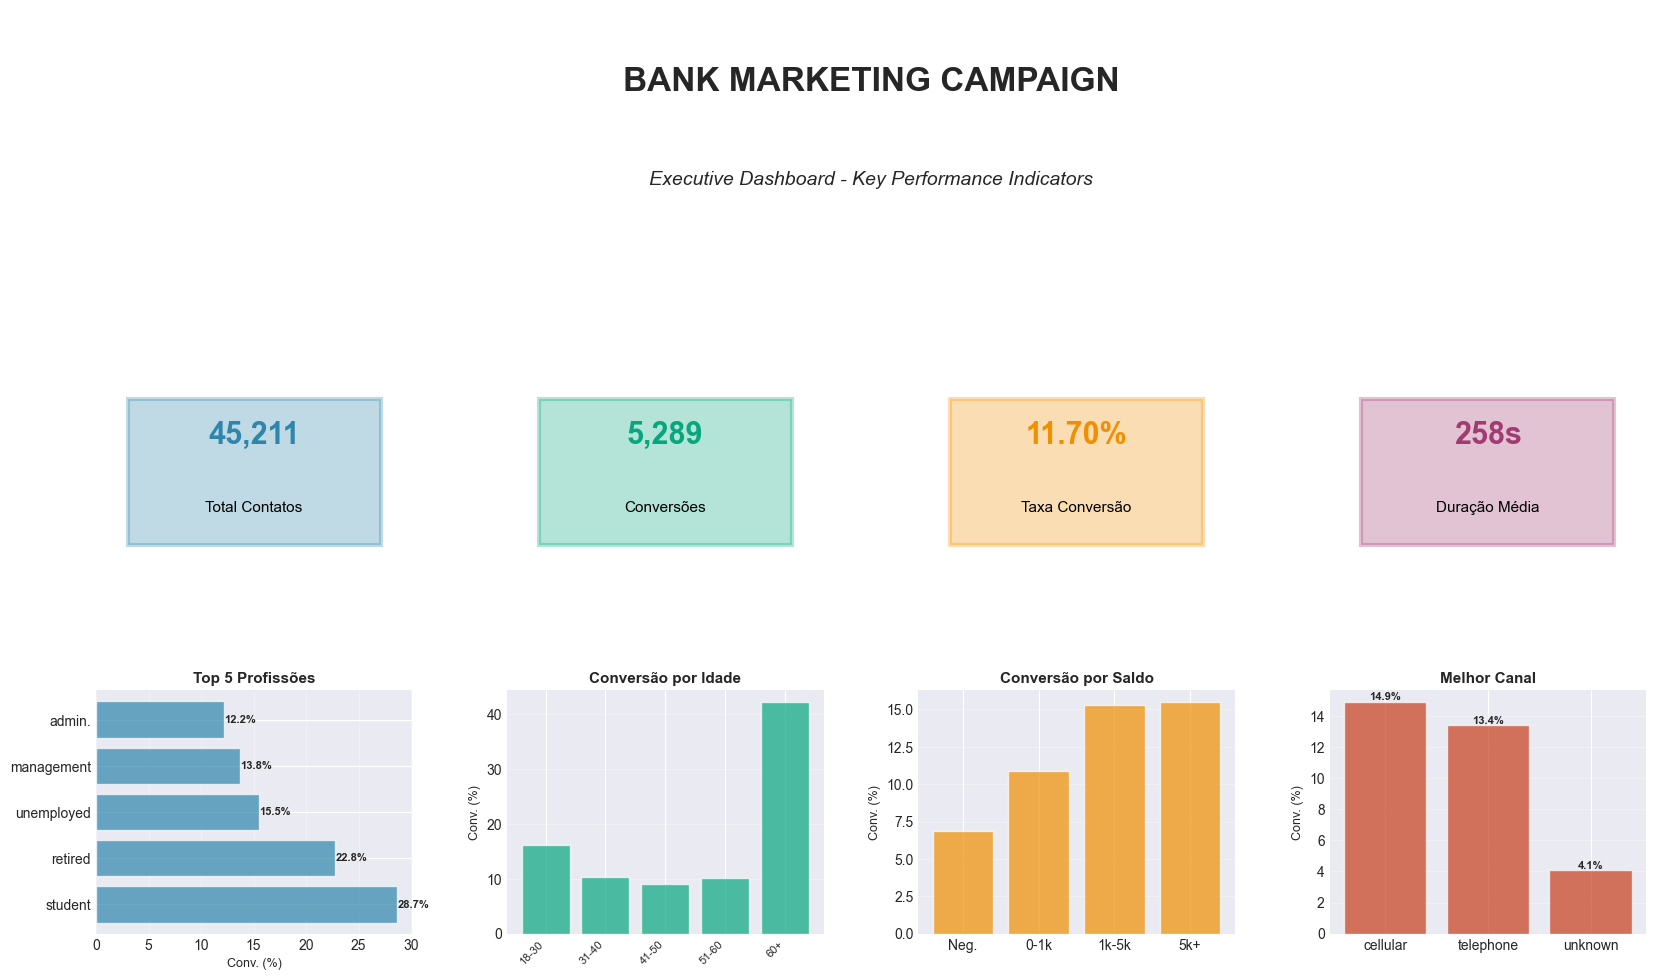

✓ Dashboard executivo criado
Taxa global de conversão: 11.70%

Top 3 categorias em 'job' com maior conversão:
job
student       28.68%
retired       22.79%
unemployed     15.5%
Name: y, dtype: object

Variáveis numéricas mais correlacionadas com o target:
duration    0.395
pdays       0.104
previous    0.093
campaign   -0.073
balance     0.053
Name: y_bin, dtype: float64


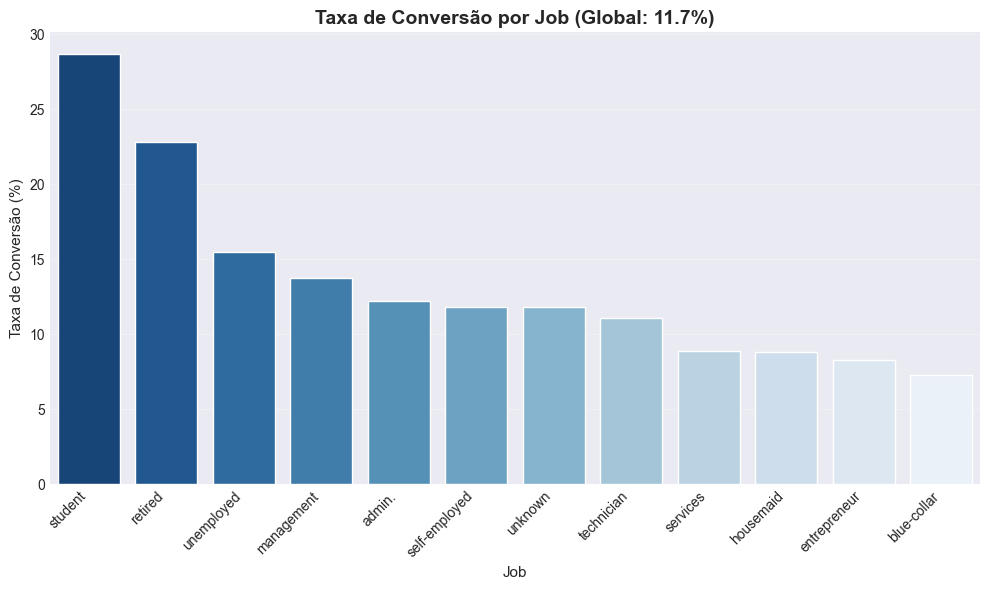



TODAS AS VISUALIZAÇÕES GERADAS COM SUCESSO!




In [149]:

import visualizacoes_novas
importlib.reload(visualizacoes_novas)
from visualizacoes_novas import BankDataVisualization


df = pd.read_csv('dados/bank-full.csv', sep=';')


viz = BankDataVisualization(df)

viz.gerar_todas_visualizacoes(save_all=True)



In [151]:
import importlib
import tratamento
importlib.reload(tratamento)
from tratamento import BankDataTreatment

print("Iniciando o tratamento dos dados...")

# Carregar dados
df = pd.read_csv('dados/bank-full.csv', sep=';')

# Executar tratamento completo -> parâmetros padrão mas podem ser alterados
# def pipeline_completo(
#        self,
#         missing_strategy: str = 'smart', -> pode ser 'smart', 'mode' ou 'remove'  
#         outlier_method: str = 'cap', -> pode ser 'cap', 'remove',
#                                          'log_transform' ou 'none'
#         encoding_method: str = 'mixed', -> pode ser 'onehot', 'label' ou 'mixed'
#         balance: bool = True
#     )
treatment = BankDataTreatment(df)
X, y = treatment.pipeline_completo()

# Versão conservadora (sem outliers removidos)
X_v1, y_v1 = treatment.pipeline_completo(outlier_method='none')

# Versão agressiva (remove outliers)
X_v2, y_v2 = treatment.pipeline_completo(outlier_method='remove')

Iniciando o tratamento dos dados...

PIPELINE COMPLETO DE TRATAMENTO DE DADOS

TRATAMENTO DE VALORES FALTANTES

 poutcome: 'unknown'
                  → 'never_contacted' + flag binária criada
 contact:'unknown'
                mantido como categoria (pode indicar canal offline)
 education: 1857
                'unknown' imputados com moda por profissão
 job: 288
                'unknown' imputados com moda ('blue-collar')

 Shape após tratamento: (45211, 18)

FEATURE ENGINEERING V2

 age_group: segmentação etária (5 grupos)
 high_education: flag ensino superior
 white_collar: flag trabalho administrativo/gerencial
 balance_category: categorização do saldo bancário
 tem_dividas: flag se possui qualquer tipo de empréstimo
 endividamento_total: quantidade de tipos de empréstimos (0-2)
 contato_intensivo: flag se recebeu >3 contatos na campanha
 pdays_category: tempo desde último contato categorizado
 quarter: trimestre do ano
 periodo_mes: período do mês do contato
 propensity_score: sco


PIPELINE COMPLETO DE TRATAMENTO DE DADOS

TRATAMENTO DE VALORES FALTANTES

 poutcome: 'unknown'
                  → 'never_contacted' + flag binária criada
 contact:'unknown'
                mantido como categoria (pode indicar canal offline)
 education: 1857
                'unknown' imputados com moda por profissão
 job: 288
                'unknown' imputados com moda ('blue-collar')

 Shape após tratamento: (45211, 18)

FEATURE ENGINEERING V2

 age_group: segmentação etária (5 grupos)
 high_education: flag ensino superior
 white_collar: flag trabalho administrativo/gerencial
 balance_category: categorização do saldo bancário
 tem_dividas: flag se possui qualquer tipo de empréstimo
 endividamento_total: quantidade de tipos de empréstimos (0-2)
 contato_intensivo: flag se recebeu >3 contatos na campanha
 pdays_category: tempo desde último contato categorizado
 quarter: trimestre do ano
 periodo_mes: período do mês do contato
 propensity_score: score heurístico de propensão (0-12)
 h

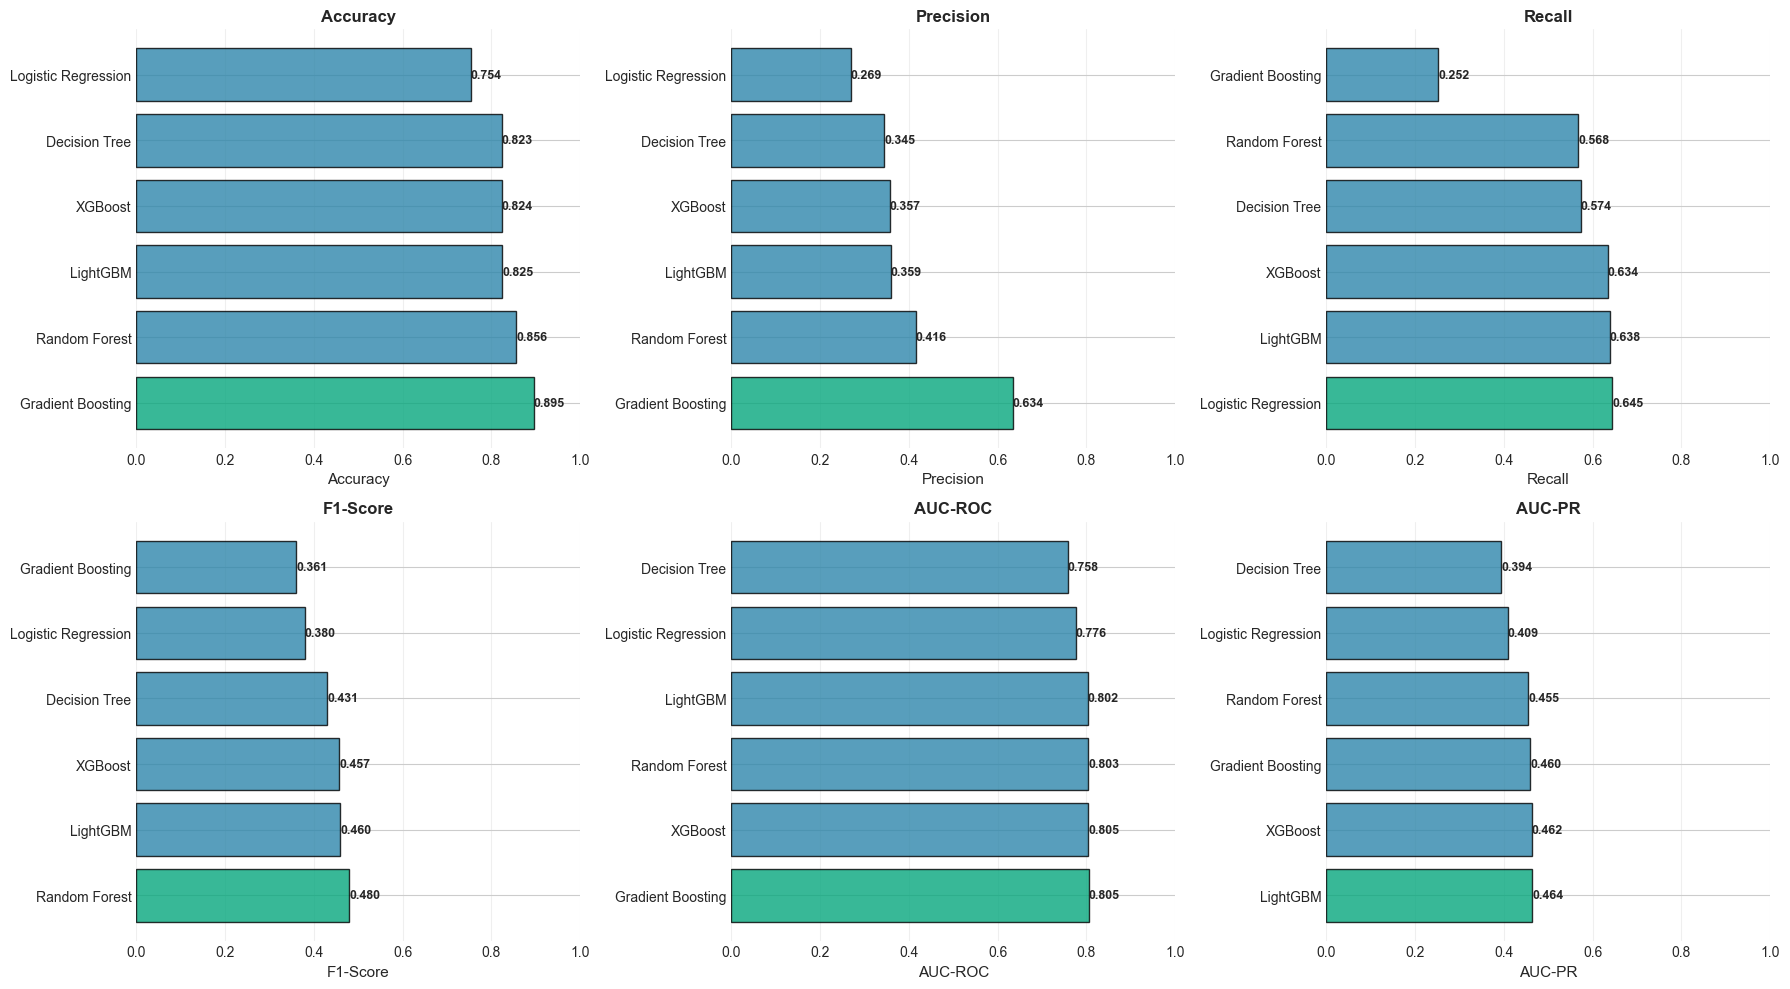

 Comparação de baseline models plotada


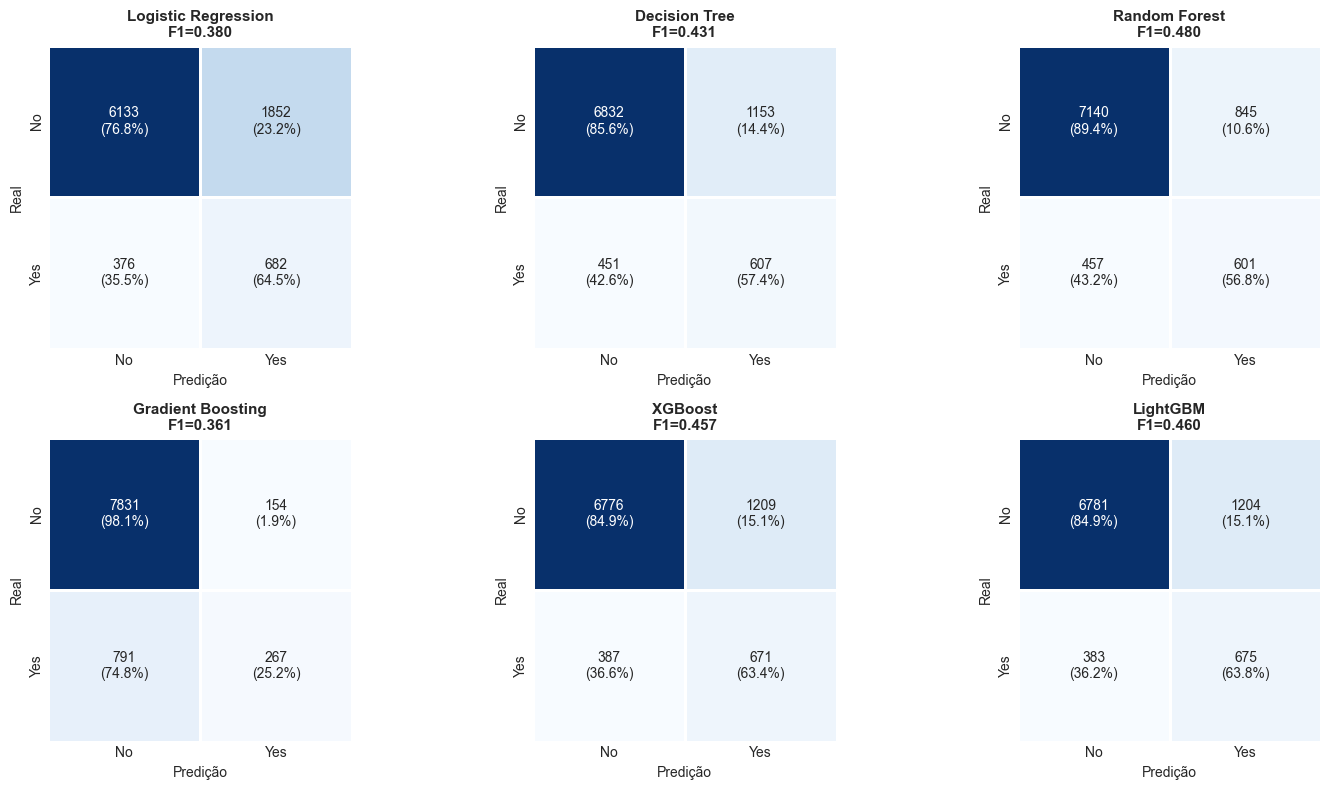

 Matrizes de confusão plotadas


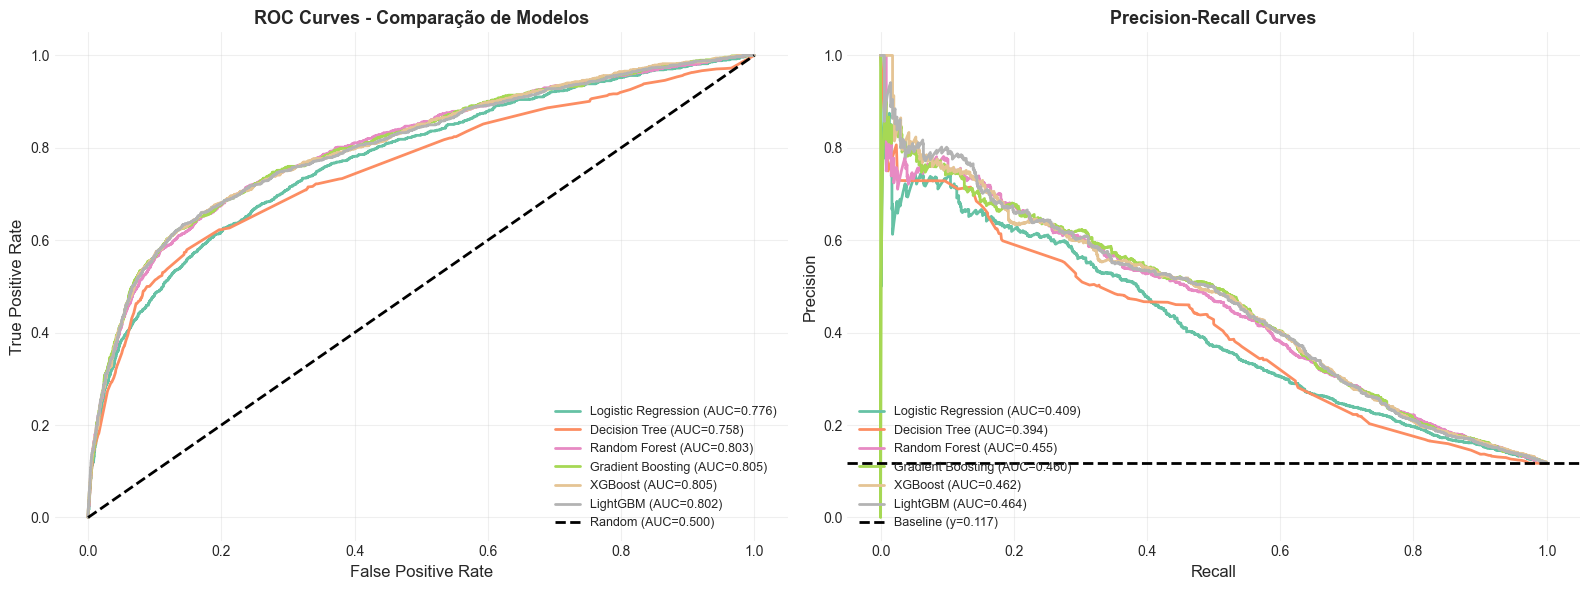

 Curvas ROC e Precision-Recall plotadas

ETAPA 2/6: FEATURE SELECTION

FEATURE SELECTION ANALYSIS

Calculando Mutual Information...
Calculando importância via Random Forest...
Executando RFE...

TOP 20 FEATURES MAIS IMPORTANTES
                 feature  mi_score  mi_rank  rf_importance  rf_rank  rfe_rank  rfe_selected  avg_rank
                 balance    0.0243   5.0000         0.1061   2.0000         1          True    2.6667
             balance_log    0.0233   7.0000         0.1062   1.0000         1          True    3.0000
           month_encoded    0.0248   4.0000         0.0594   6.0000         1          True    3.6667
        previous_success    0.0299   2.0000         0.0301  13.0000         1          True    5.3333
        poutcome_success    0.0312   1.0000         0.0328   9.0000         8         False    6.0000
                 age_log    0.0141  13.0000         0.0809   4.0000         1          True    6.0000
            month_number    0.0220   8.0000         0.0322

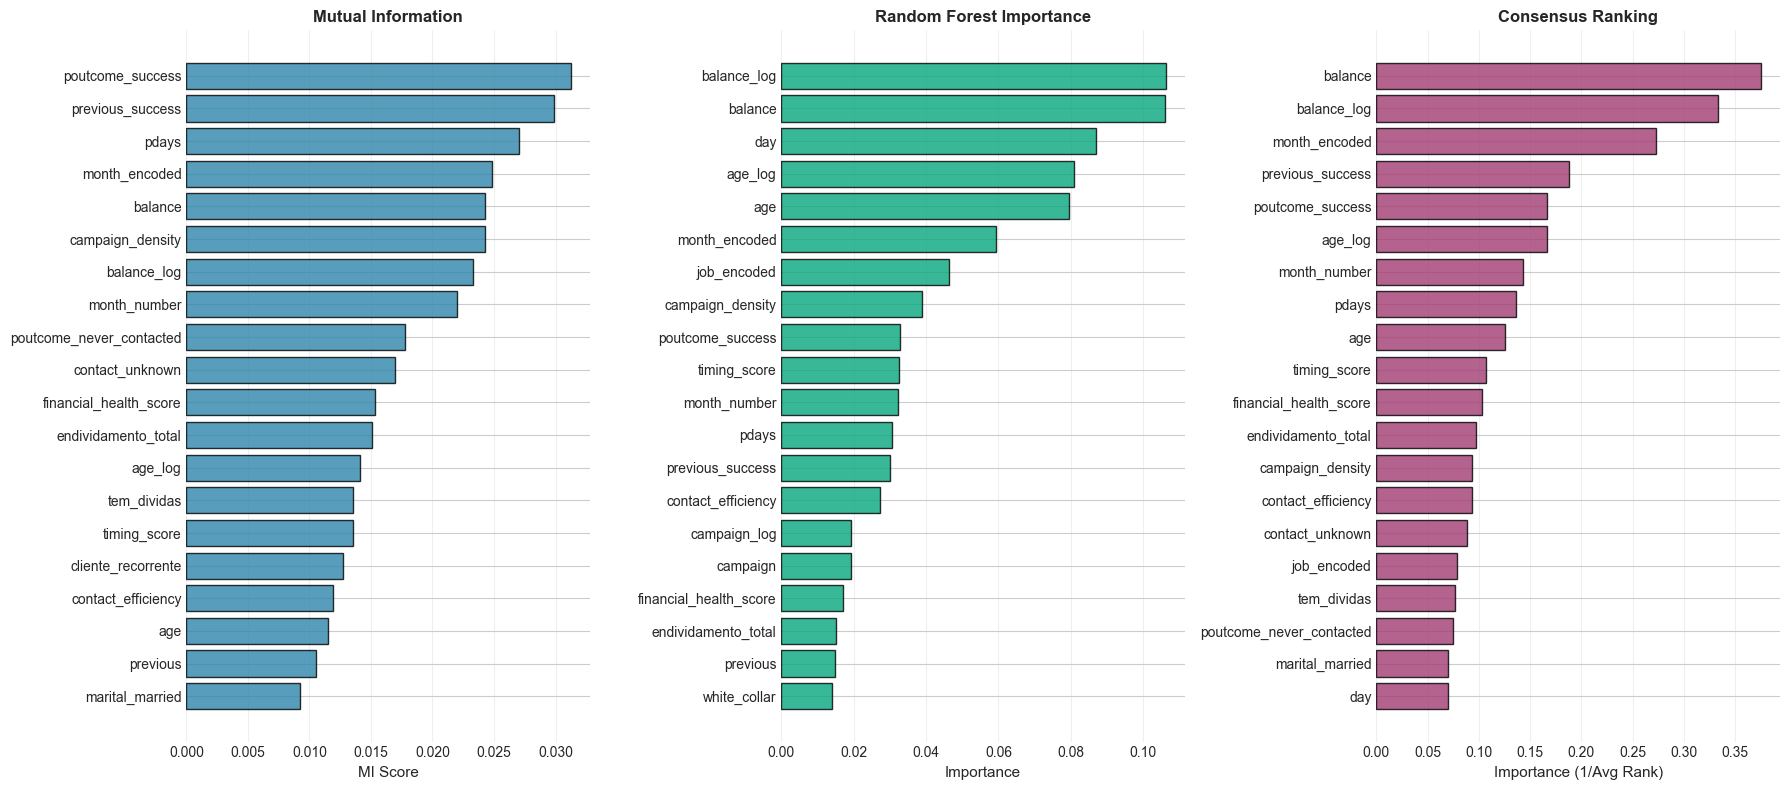

 Feature importance plotada

ETAPA 3/6: HYPERPARAMETER TUNING

HYPERPARAMETER TUNING - XGBoost

Iniciando random search com 100 iterações...
Otimizando para: f1
Cross-validation: 5 folds estratificados

Fitting 5 folds for each of 100 candidates, totalling 500 fits

MELHORES HIPERPARÂMETROS ENCONTRADOS
  subsample: 0.6
  n_estimators: 100
  min_child_weight: 1
  max_depth: 10
  learning_rate: 0.01
  gamma: 0.2
  colsample_bytree: 0.6

Melhor F1-Score (CV): 0.4739

Performance no Test Set:
   F1-Score: 0.4745
   AUC-ROC: 0.8031


ETAPA 4/6: INTERPRETABILIDADE (SHAP)

INTERPRETABILIDADE DO MODELO (SHAP)

Calculando SHAP values (pode demorar alguns minutos)...
 SHAP values calculados



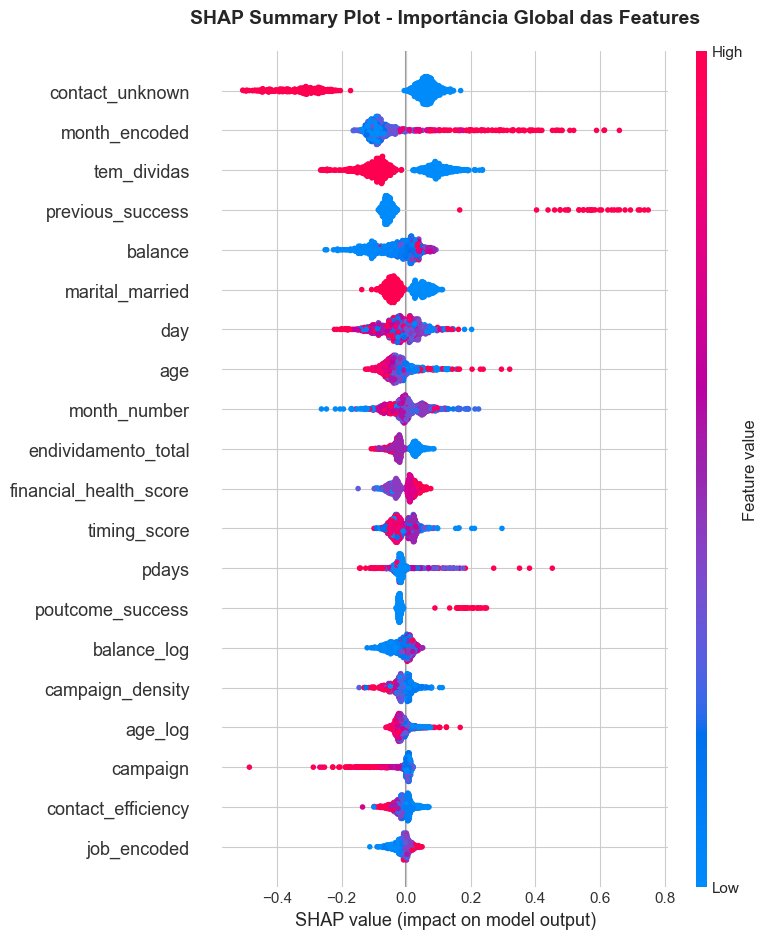

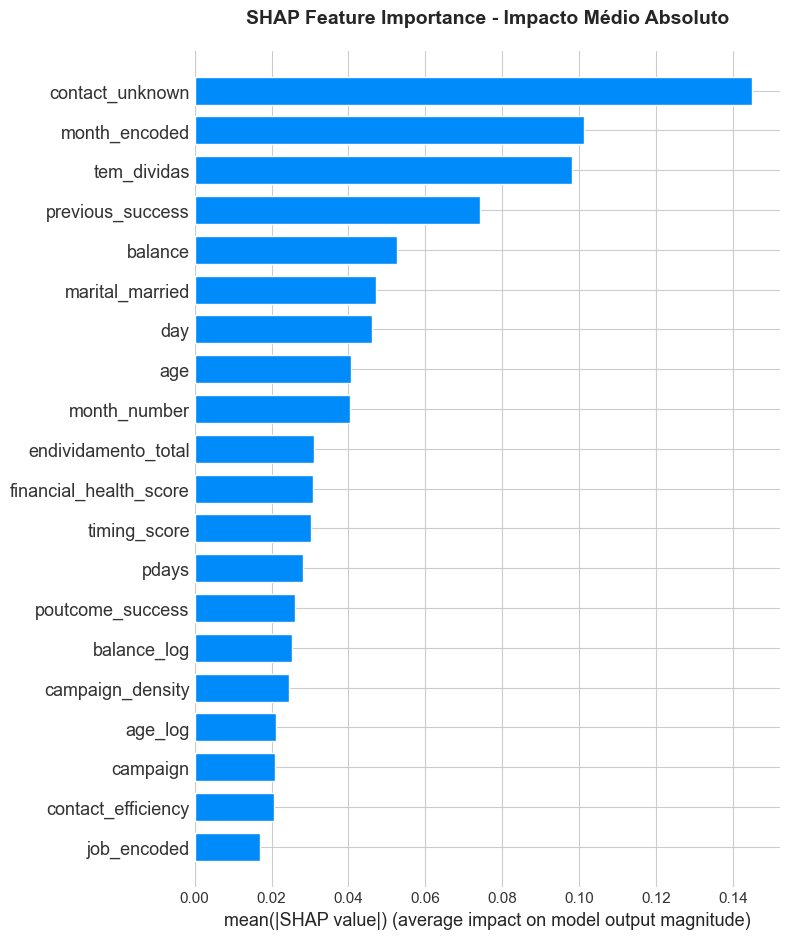

 Gráficos SHAP gerados

Interpretação:
   - Cor VERMELHA: valor alto da feature
   - Cor AZUL: valor baixo da feature
   - Eixo X: impacto na predição (positivo = aumenta chance de conversão)
   - Quanto mais à direita, maior o impacto positivo

ETAPA 5/6: BUSINESS METRICS & THRESHOLD OPTIMIZATION

VISUALIZAÇÃO: OTIMIZAÇÃO DE THRESHOLD


OTIMIZAÇÃO DE THRESHOLD PARA MAXIMIZAÇÃO DE LUCRO

THRESHOLD ÓTIMO PARA LUCRO:
  Threshold: 0.27
  Lucro: R$ 836,145.00
  ROI: 380.7%
  F1-Score: 0.215
  Contatos: 43931 (97.2% da população)
  Conversões: 5279 (99.8% do total)

THRESHOLD ÓTIMO PARA ROI:
  Threshold: 0.78
  ROI: 3297.0%
  Lucro: R$ 32,805.00
  F1-Score: 0.062

THRESHOLD ÓTIMO PARA F1 (referência):
  Threshold: 0.54
  F1-Score: 0.491
  Lucro: R$ 520,230.00

COMPARAÇÃO COM BASELINE (Lucro: R$ 831,745.00):
  Threshold ótimo lucro: +4,400.00 (+0.5%)
  Threshold ótimo F1: -311,515.00 (-37.5%)

 Modelo VIÁVEL - Threshold 0.27 gera R$ 4,400.00 a mais!


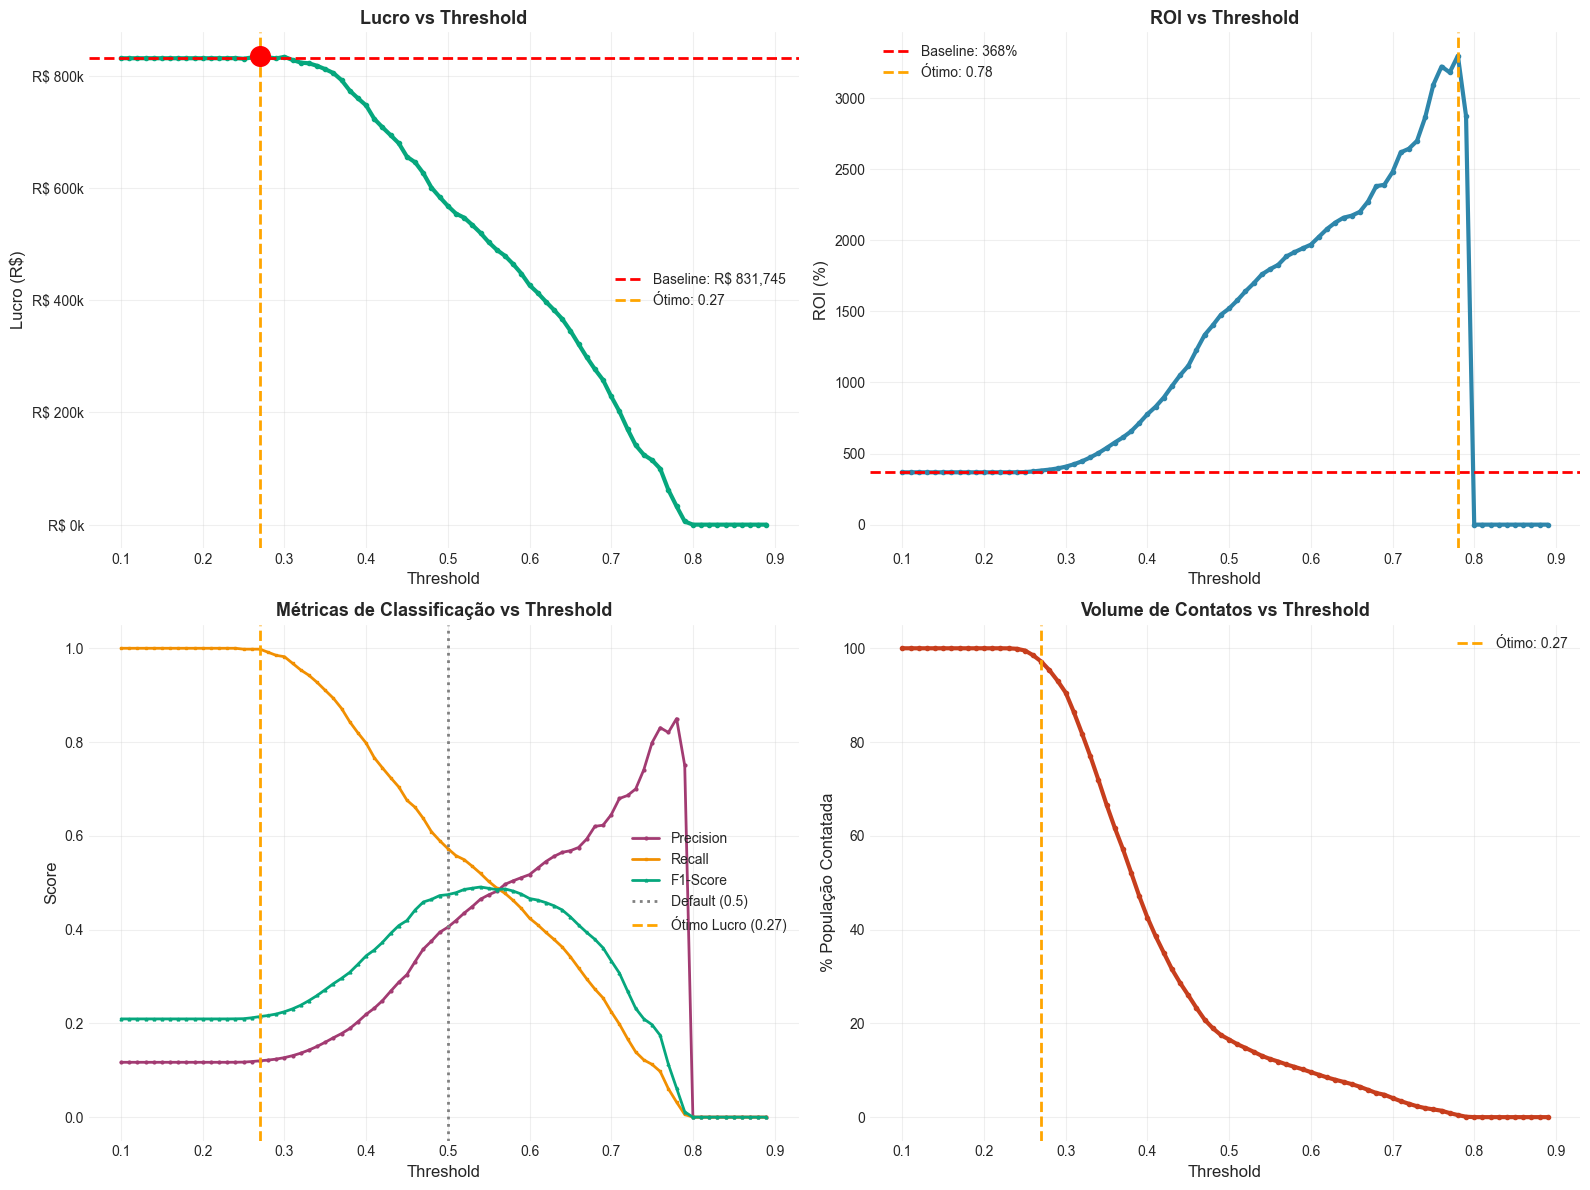


 Threshold ótimo para LUCRO: 0.27 (Lucro: R$ 836,145.00)
 Variação vs baseline: R$ +4,400.00


OTIMIZAÇÃO DE THRESHOLD PARA MAXIMIZAÇÃO DE LUCRO

THRESHOLD ÓTIMO PARA LUCRO:
  Threshold: 0.27
  Lucro: R$ 836,145.00
  ROI: 380.7%
  F1-Score: 0.215
  Contatos: 43931 (97.2% da população)
  Conversões: 5279 (99.8% do total)

THRESHOLD ÓTIMO PARA ROI:
  Threshold: 0.78
  ROI: 3297.0%
  Lucro: R$ 32,805.00
  F1-Score: 0.062

THRESHOLD ÓTIMO PARA F1 (referência):
  Threshold: 0.54
  F1-Score: 0.491
  Lucro: R$ 520,230.00

COMPARAÇÃO COM BASELINE (Lucro: R$ 831,745.00):
  Threshold ótimo lucro: +4,400.00 (+0.5%)
  Threshold ótimo F1: -311,515.00 (-37.5%)

 Modelo VIÁVEL - Threshold 0.27 gera R$ 4,400.00 a mais!

BUSINESS METRICS & ROI ANALYSIS

CENÁRIO BASELINE (Contatar todos da população):
   Total de clientes: 45,211
   Taxa de conversão estimada: 11.70%
   Conversões estimadas: 5,289
   Custo total: R$ 226,055.00
   Receita total: R$ 1,057,800.00
   Lucro: R$ 831,745.00
   ROI: 367.94%

C

['model_pipeline_final.pkl']

In [154]:
#Script do fluxo final de modeling, considerando achados durante iterações.

import pandas as pd
import tratamento
importlib.reload(tratamento)
from tratamento import BankDataTreatment
import modelling
importlib.reload(modelling)
from modelling import BankMarketingPipeline

import joblib

# Carregando novamente
df = pd.read_csv('dados/bank-full.csv', sep=';')

# 2. Tratamento SEM SMOTE - previnir leakage
treatment = BankDataTreatment(df)

X, y = treatment.pipeline_completo(
    missing_strategy='smart',
    outlier_method='log_transform',
    encoding_method='mixed',
    balance=False
)


# Para garantir: Verificar presença de colunas ou que possam causar leakage
# ou que sejam de baixa importância para o modelo, para diminuir a dimensionalidade

leakage_cols = [
    'target',
    'duration',
    'duration_cat',
    'eficiencia_campanha', 
    'duration_category',
    'propensity_score',
    'contact_history_weighted',
    'never_contacted_before',
    'housing_yes'
    ]
present_leakage = [col for col in leakage_cols if col in X.columns]

if present_leakage:
    print(f"\n ALERTA: {present_leakage} estão presentes!")
    print("   São LEAKAGE pois só são conhecidos APÓS a ligação")
    print("   Removendo para teste...")
    X_no_leak = X.drop(columns=present_leakage)
else:
    print("\n✓ Nenhuma coluna de leakage encontrada")
    X_no_leak = X.copy()



pipeline = BankMarketingPipeline(X_no_leak, y)
final_results = pipeline.run_complete_pipeline(
    tune_model='XGBoost',
    save_plots=True,
)

# salvando o artefato. Poderíamos implementar em uma API por exemplo. 
joblib.dump(pipeline, 'model_pipeline_final.pkl')